In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics,preprocessing
#from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [2]:
# path='/home/sultan/EEG/Source_Level_Analysis/25sam_10ms_clear_all_erp.csv'
# path='/home/sultan/EEG/Source_Level_Analysis/50tr10ms_all_clear_erp.csv'
# path="/home/sultan/EEG/Source_Level_Analysis/75sam_10ms_clear_all_erp.csv"
path="/home/sultan/EEG/Source_Level_Analysis/100sam_10ms_clear_all_erp.csv"
dataset =pd.read_csv(path)

In [3]:
Xc=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(Xc)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=40) 

In [5]:
X_test.shape, y_test.shape

((373, 1428), (373,))

In [6]:
np.unique(y_test)
np.unique(y_test,return_counts=True)

(array([0., 1.]), array([148, 225]))

# Grid search

In [7]:
cv=10
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1, 6.5, 10,20,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
parameters = {'kernel':['rbf'], 'C':[1, 6.5, 10,20,100,1000],'gamma':[0.01,0.002,0.00069,0.0007,0.0005]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [1, 6.5, 10, 20, 100, 1000], 'gamma': [0.01, 0.002, 0.00069, 0.0007, 0.0005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [8]:
# cv=10
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[0.90,1.00,1.25],'gamma':[3.0,3.25,3.25 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

In [9]:
# # Average Scores
# #  print clf.cv_results_
# # clf.best_estimator_
# # np.mean
# scores=clf.cv_results_['mean_test_score']
# print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))

In [10]:
pred=clf.best_estimator_.predict(X_test)
acc1=accuracy_score(y_test, pred)
print "Accuracy:", clf.score(X_test, y_test) 
print acc1
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

Accuracy: 0.938337801608579
0.938337801608579
support: 66.4429530201


In [11]:
conf_mat=confusion_matrix(y_test,pred)
conf_mat

array([[132,  16],
       [  7, 218]])

In [12]:
from sklearn.metrics import classification_report
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.95      0.89      0.92       148
        1.0       0.93      0.97      0.95       225

avg / total       0.94      0.94      0.94       373



In [13]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9303903903903904

In [14]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr, tpr)
roc_auc

0.9303903903903904

In [15]:
clf.best_estimator_

SVC(C=6.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.00069, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
# cv=10
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1],'gamma':[0.01 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

# Bayesian Optimization

In [17]:
cv=10
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['rbf'], 'C':[1,5,10*.65,10**0.651,7,8],'gamma':[0.1,0.0005,0.000612,0.0006815,10**-3.20]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
print clf.score(X_test, y_test)  
# print pred
# print y_test
print(classification_report(y_test, pred))

0.938337801608579
             precision    recall  f1-score   support

        0.0       0.95      0.89      0.92       148
        1.0       0.93      0.97      0.95       225

avg / total       0.94      0.94      0.94       373



In [18]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9303903903903904

In [19]:
clf.best_estimator_

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.00063095734448,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [20]:
pred=clf.best_estimator_.predict(X_test)
print "Accuracy:", clf.score(X_test, y_test)  
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

Accuracy: 0.938337801608579
support: 63.8926174497


In [21]:
# pred=clf.best_estimator_.predict(X_test)
# clf.score(X_test, y_test)  
# # print pred
# # print y_test

In [22]:
# k=0;j=68;
# for i in range(0,21):
#     print k,j
#     k=k+68;j=j+68;

In [23]:
k=0;j=68; acgw=[];pmw=[];aucw=[];
for i in range(0,21):
    cv=10
    from sklearn.model_selection import GridSearchCV
    parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgw=np.append(acgw,acc)
    print "Accuracy:",acc
    perf=classification_report(y_test, pred)
    pmw.append(perf)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
    roc_auc=metrics.auc(fpr, tpr)
    roc_auc
    aucw.append(roc_auc)
    print"ROC", roc_auc
    print perf
    print k,j
    k=k+68;j=j+68;
#     scores=clf.cv_results_['mean_test_score']
#     print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))

Accuracy: 0.7426273458445041
ROC 0.730015015015015
             precision    recall  f1-score   support

        0.0       0.68      0.67      0.67       148
        1.0       0.78      0.79      0.79       225

avg / total       0.74      0.74      0.74       373

0 68
Accuracy: 0.7533512064343163
ROC 0.75509009009009
             precision    recall  f1-score   support

        0.0       0.66      0.76      0.71       148
        1.0       0.83      0.75      0.79       225

avg / total       0.76      0.75      0.76       373

68 136
Accuracy: 0.7989276139410187
ROC 0.8009609609609609
             precision    recall  f1-score   support

        0.0       0.72      0.81      0.76       148
        1.0       0.86      0.79      0.83       225

avg / total       0.81      0.80      0.80       373

136 204
Accuracy: 0.7908847184986595
ROC 0.7942942942942941
             precision    recall  f1-score   support

        0.0       0.71      0.81      0.75       148
        1.0       0.86 

In [24]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0147, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
yr=X_test[:,0:68]
yr.shape

(373, 68)

In [26]:
dataset
Xc=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
# Xc

In [27]:
X.shape
np.max(acgw)

0.8096514745308311

# Hemisphere

In [28]:
a=range(0,(X.shape[1]),2)
d11=X[:,a];
X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=40) 
cv=10
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
print clf.score(X_test, y_test)  
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr, tpr)
roc_auc
print roc_auc
# print pred
# print y_test
print(classification_report(y_test, pred))

0.8873994638069705
0.8777627627627628
             precision    recall  f1-score   support

        0.0       0.88      0.83      0.85       148
        1.0       0.89      0.92      0.91       225

avg / total       0.89      0.89      0.89       373



In [29]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8777627627627628

In [30]:
pred=clf.best_estimator_.predict(X_test)
print "Accuracy:", clf.score(X_test, y_test)  
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

Accuracy: 0.8873994638069705
support: 50.3355704698


In [31]:
clf.best_estimator_

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.000700280112045,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
# only 34 features 
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
svc = svm.SVC()
k=0;j=34; acgr=[];aucrh=[];pmrh=[];
for i in range(0,21):
    cv=10
    from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgr=np.append(acgr,acc)
    print "Accuracy:", acc
    perf=classification_report(y_test, pred)
    pmrh.append(perf)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
    roc_auc=metrics.auc(fpr, tpr)
    roc_auc
    aucrh.append(roc_auc)
    print "ROC:", roc_auc
    print perf
    print k,j
    k=k+34;j=j+34;

Accuracy: 0.6943699731903485
ROC: 0.6923273273273274
             precision    recall  f1-score   support

        0.0       0.60      0.68      0.64       148
        1.0       0.77      0.70      0.73       225

avg / total       0.70      0.69      0.70       373

0 34
Accuracy: 0.6729222520107239
ROC: 0.6710810810810812
             precision    recall  f1-score   support

        0.0       0.58      0.66      0.62       148
        1.0       0.75      0.68      0.71       225

avg / total       0.68      0.67      0.68       373

34 68
Accuracy: 0.7319034852546917
ROC: 0.7292192192192193
             precision    recall  f1-score   support

        0.0       0.65      0.72      0.68       148
        1.0       0.80      0.74      0.77       225

avg / total       0.74      0.73      0.73       373

68 102
Accuracy: 0.7828418230563002
ROC: 0.7864714714714715
             precision    recall  f1-score   support

        0.0       0.70      0.80      0.75       148
        1.0       

# LH

In [33]:
b=range(1,(X.shape[1]),2)
d22=X[:,b];
X_train, X_test, y_train, y_test = train_test_split(d22,y, test_size=.20, random_state=40) 
cv=10
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
# print clf.score(X_test, y_test)  
# print pred
# print y_test
perf=classification_report(y_test, pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr, tpr)
roc_auc
print roc_auc
print perf

0.9327027027027026
             precision    recall  f1-score   support

        0.0       0.94      0.91      0.92       148
        1.0       0.94      0.96      0.95       225

avg / total       0.94      0.94      0.94       373



In [34]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9327027027027026

In [35]:
pred=clf.best_estimator_.predict(X_test)
print "Accuracy:", clf.score(X_test, y_test)  
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

Accuracy: 0.938337801608579
support: 69.4630872483


In [36]:
# acg=[];
# for i in range(0,6,2):
#     acg=np.append(acg,i)

In [37]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.00140056022409,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [38]:
k=0;j=34; acgl=[];auclh=[];pmlh=[];
for i in range(0,21):
    cv=10
    from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgl=np.append(acgl,acc)
    print "Accuracy:", acc
    perf=classification_report(y_test, pred)
    pmlh.append(perf)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
    roc_auc=metrics.auc(fpr, tpr)
    roc_auc
    auclh.append(roc_auc)
    print "ROC:", roc_auc
    print perf
    print k,j
    k=k+34;j=j+34;

Accuracy: 0.7265415549597856
ROC: 0.7178378378378378
             precision    recall  f1-score   support

        0.0       0.65      0.68      0.66       148
        1.0       0.78      0.76      0.77       225

avg / total       0.73      0.73      0.73       373

0 34
Accuracy: 0.7265415549597856
ROC: 0.7166816816816817
             precision    recall  f1-score   support

        0.0       0.65      0.67      0.66       148
        1.0       0.78      0.76      0.77       225

avg / total       0.73      0.73      0.73       373

34 68
Accuracy: 0.7908847184986595
ROC: 0.7896696696696697
             precision    recall  f1-score   support

        0.0       0.72      0.78      0.75       148
        1.0       0.85      0.80      0.82       225

avg / total       0.80      0.79      0.79       373

68 102
Accuracy: 0.774798927613941
ROC: 0.7774924924924925
             precision    recall  f1-score   support

        0.0       0.69      0.79      0.74       148
        1.0       0

In [39]:
t=np.linspace(0,200,21, endpoint=True)
time=pd.DataFrame(t)
# a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgl),pd.DataFrame(acgr)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])
a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgr),pd.DataFrame(acgl)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])

In [40]:
np.max(acgl)
np.max(a.iloc[:,3])

0.7908847184986595

In [41]:
a

,time,Whole,LH,RH
,0,0,0,0
0,0.0,0.742627,0.694370,0.726542
1,10.0,0.753351,0.672922,0.726542
2,20.0,0.798928,0.731903,0.790885
3,30.0,0.790885,0.782842,0.774799
4,40.0,0.782842,0.731903,0.739946
5,50.0,0.809651,0.793566,0.777480
6,60.0,0.777480,0.739946,0.780161
7,70.0,0.772118,0.723861,0.782842
8,80.0,0.772118,0.734584,0.715818


# Writing the csv data all

In [42]:
# wpath="/home/sultan/EEG/Source_Level_Analysis/SVM_results/"
# dall=a
# dall.to_csv(wpath+'svm_res_100sam_10ms_clear_v1.csv')

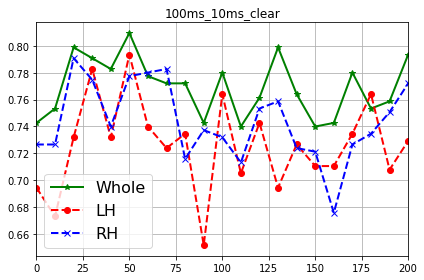

In [43]:
axis_font = {'fontname':'Arial', 'size':'15'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
tw1=a.iloc[0:,0];Acdw=a.iloc[0:,1];Acdlh=a.iloc[0:,2];Acdrh=a.iloc[0:,3]
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdlh,'--r',linewidth=2,marker='o')
plt.plot(tw1, Acdrh,'--b',linewidth=2,marker='x')
plt.title("100ms_10ms_clear")
plt.xlim(0,200)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
# plt.xlabel('Time (ms)',**axis_font)
# plt.ylabel('Accuracy (%)',**axis_font)
# plt.title('Whole brain',**axis_font)
# plt.yticks(**axis_font)
# plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Whole','LH','RH'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()

In [44]:
len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

61.006711409395976

In [45]:
# dall

In [46]:
X_train.shape

(1490, 714)

In [48]:
# wpath="/home/sultan/EEG/Source_Level_Analysis/SVM_results/"
# dall=a
# dall.to_csv(wpath+'svm_res_100sam_10ms_clear_v3_cv10.csv')